<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [1]:
# Import Libraries (pandas, numpy, matplotlib)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________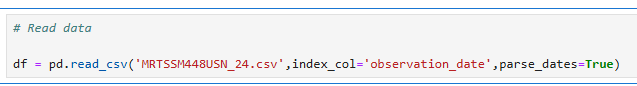

In [2]:
df = pd.read_csv('MRTSSM448USN_24-1.csv', index_col='observation_date', parse_dates=True)

In [3]:
# Print the first few rows of data
#d
df.head()

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________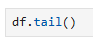

In [4]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [5]:
# Set name of column as 'Sales'. Use - df.columns 

# ...
df.columns= ["Sales"]
df.head()

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________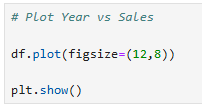

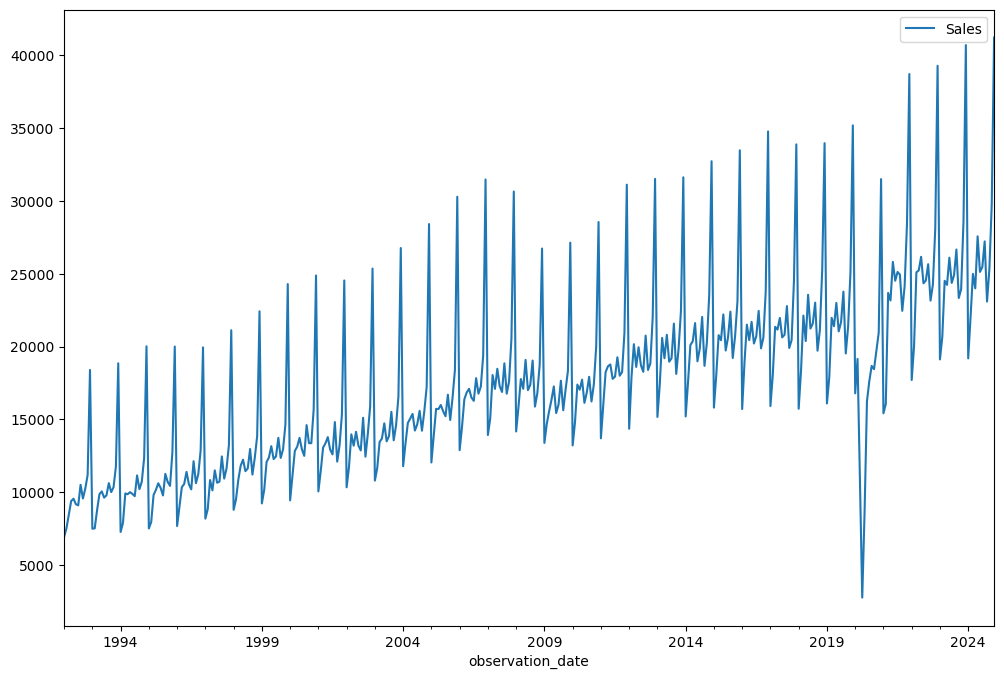

In [6]:
df.plot(figsize=(12,8))
plt.show()

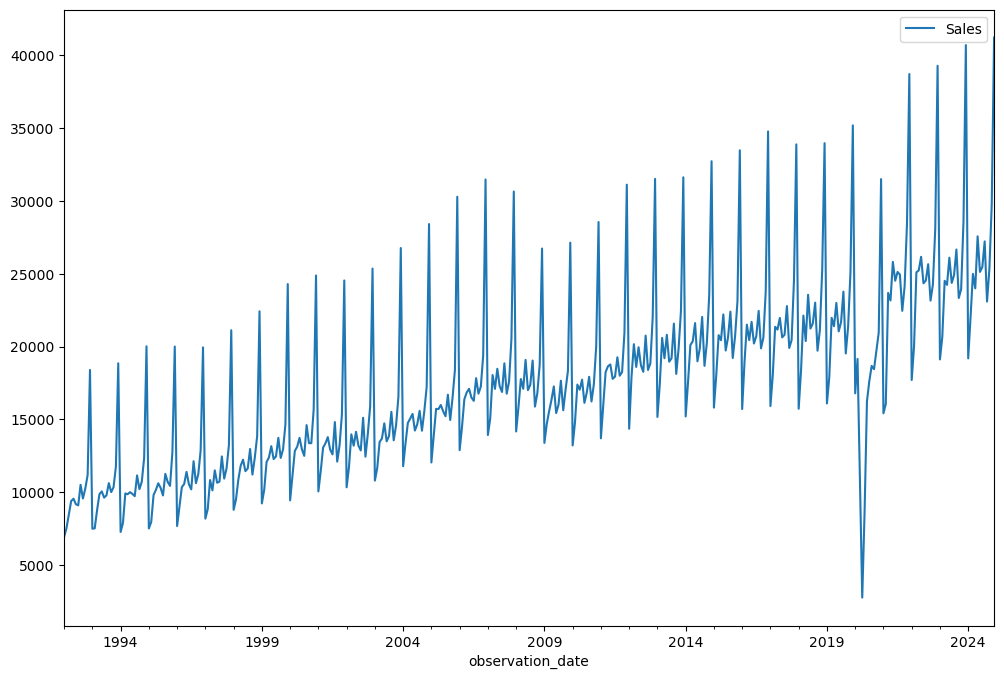

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________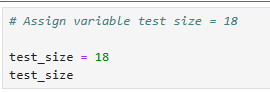

In [7]:
test_size= 18
test_size

18

18

__________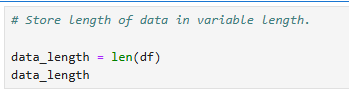

In [8]:
data_length=len(df)
data_length

396

396

__________________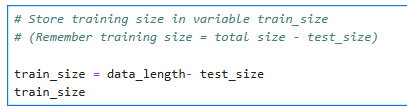

In [9]:
train_size = data_length - test_size
train_size

378

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________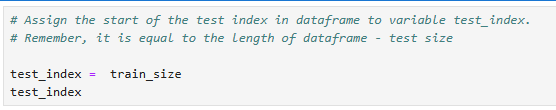

In [10]:
test_index = train_size
test_index

378

378

Next, we will separate train and test datasets.

_________________________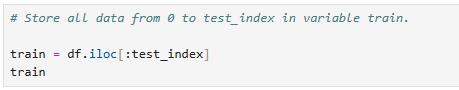

In [11]:
train = df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [12]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc

test = df.iloc[test_index:]
test


,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [13]:
# Print the size of the train data

# test_index = train_size
#test_index = train_size


# Print the size of the test data
test_index

#test_index = train_size
test_size


18

378
18


### In Neural Networks, we need to Scale Data between 0-1

___________________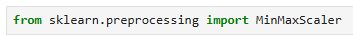

In [14]:
from sklearn.preprocessing import MinMaxScaler

_______________________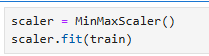

In [15]:
scaler = MinMaxScaler()
scaler.fit(train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [34]:
MinMaxScaler()

,feature_range,"(0, ...)"
,copy,True
,clip,False


MinMaxScaler()

__________________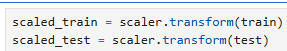

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
# Check if the data has been scaled properly
# Print max and min for train and test

print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0530599939704552
0.0
0.44980403979499545


1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________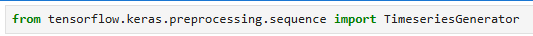

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
#TimeseriesGenerator?

_________________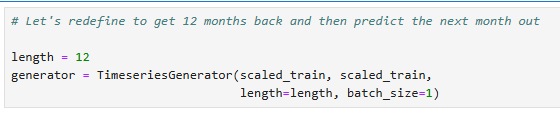

In [19]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length =length, batch_size =1)

_______________________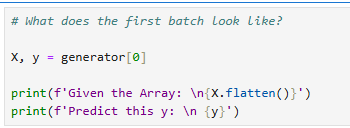

In [20]:
x, y = generator[0]
print(f' Given the Array: \n{x.flatten()}')
print(f' Predict this y: \n {y}')

 Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
 Predict this y: 
 [[0.12952558]]


Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

__________________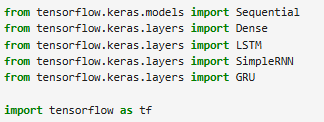

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________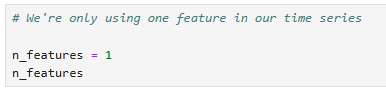

In [22]:
n_features = 1
n_features

1

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [23]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
 
#input_shape = (120, n_features)
model = Sequential()
model.add(SimpleRNN(140, activation='relu', return_sequences=True, input_shape=(length, n_features)))
model.add(SimpleRNN(70, activation='relu'))
model.add(Dense(1)) #because it is the regression task


C:\Users\eresy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 12, 140)             │          19,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 70)                  │          14,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,721 (135.63 KB)

 Trainable params: 34,721 (135.63 KB)

 Non-trainable params: 0 (0.00 B)

_____________________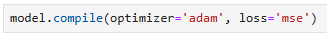

In [25]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

____________________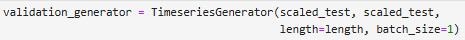

In [26]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length = length, batch_size =1)

___________________

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# However,
# If the last digit of your SID = 0, then assign patience=10
# If the last digit of your SID = 1, then assign patience=11
# If the last digit of your SID = 2, then assign patience=12
# If the last digit of your SID = 3, then assign patience=13

# For example, your SID = 22984879, then patience=9
# One more example: your SID = 22984883, then patience=13

LAST_DIGIT_IN_YOUR_SID = 16

early_stop = EarlyStopping(monitor='val_loss',patience=LAST_DIGIT_IN_YOUR_SID)


_____________________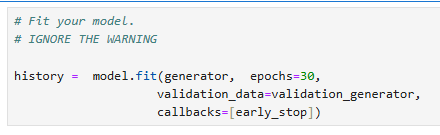

In [29]:
history = model.fit(generator, epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0166 - val_loss: 0.0210
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0105 - val_loss: 0.0029
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0136 - val_loss: 0.0531
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0144 - val_loss: 0.0249
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0108 - val_loss: 0.0147
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0017 - val_loss: 9.3315e-04
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 12/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms

C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0364 - val_loss: 0.0283
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0124 - val_loss: 0.0153
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0047 - val_loss: 0.0127
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 6.1039e-04
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0049 - val_loss: 6.4973e-04
Epoch 12/30
366/366 ━━━━━━━━━━━━

_____________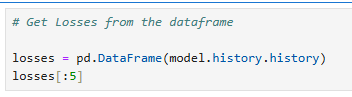

In [30]:
losses = pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.016575,0.020963
1,0.010510,0.002933
2,0.003009,0.002862
3,0.004147,0.001076
4,0.013588,0.053148


In [124]:
# the values may be different


,loss,val_loss
0,0.020090,0.028262
1,0.012648,0.015266
2,0.010198,0.001036
3,0.006880,0.003225
4,0.005237,0.012703


___________________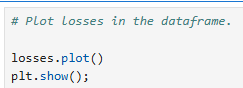

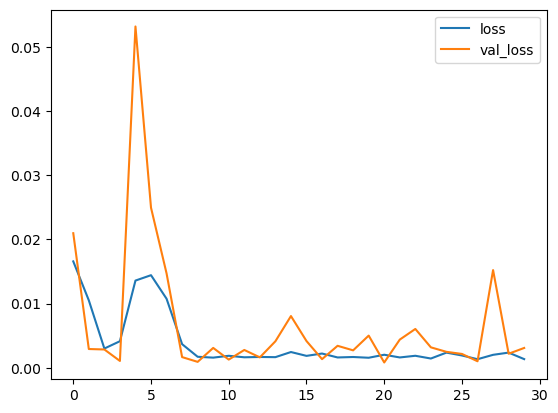

In [31]:
losses.plot()
plt.show();

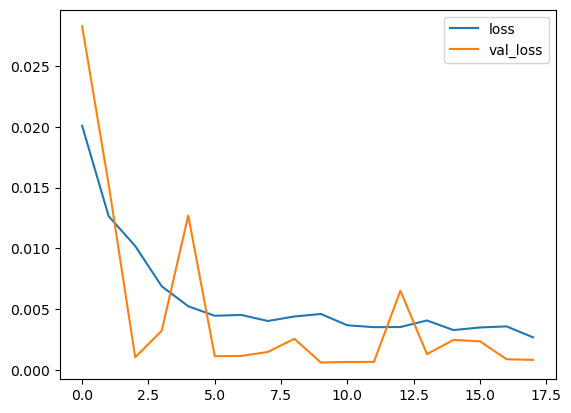

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

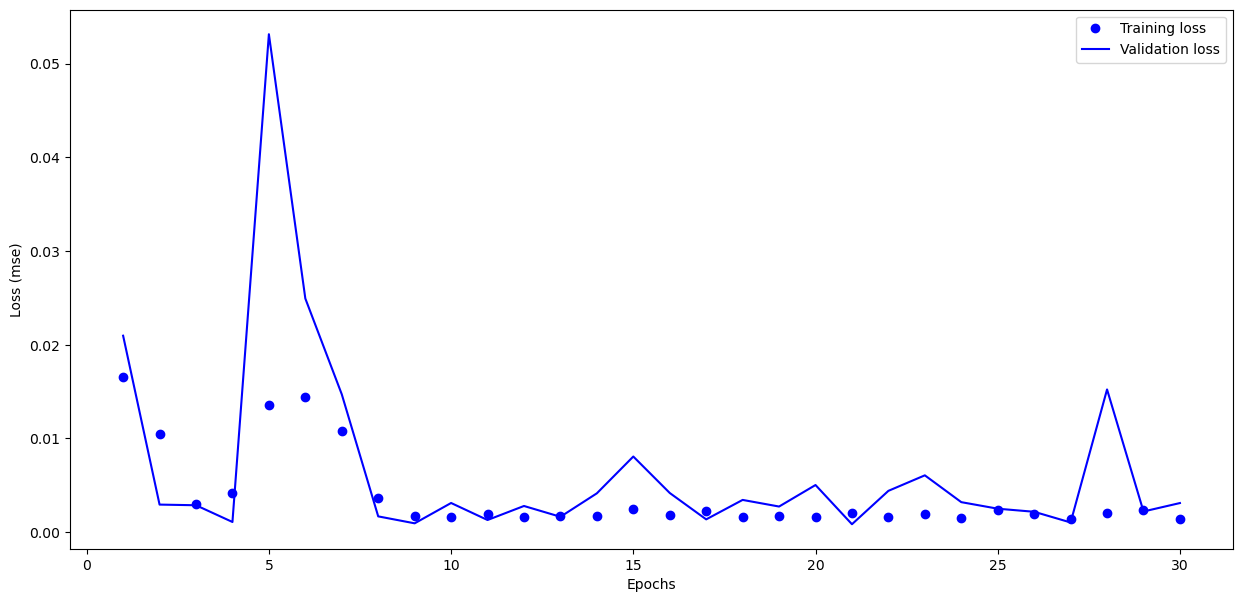

In [32]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________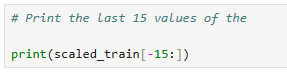

In [33]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________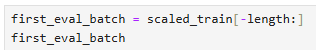

In [34]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [35]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________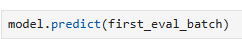

In [36]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


array([[0.59415376]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


array([[0.63285655]], dtype=float32)

_________________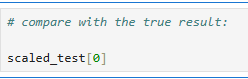

In [37]:
scaled_test[0]

array([0.60665442])

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [38]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

____________________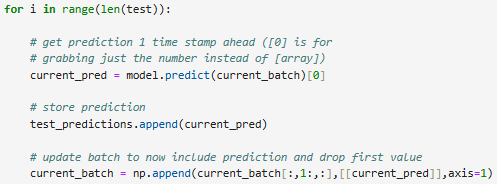

In [39]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


______________________

In [40]:
test_predictions

[array([0.59415376], dtype=float32),
 array([0.65489155], dtype=float32),
 array([0.5688098], dtype=float32),
 array([0.59003794], dtype=float32),
 array([0.67142683], dtype=float32),
 array([0.88802356], dtype=float32),
 array([0.49403805], dtype=float32),
 array([0.5100311], dtype=float32),
 array([0.5559208], dtype=float32),
 array([0.5109229], dtype=float32),
 array([0.5730934], dtype=float32),
 array([0.54223037], dtype=float32),
 array([0.56269634], dtype=float32),
 array([0.6266373], dtype=float32),
 array([0.5592059], dtype=float32),
 array([0.58452827], dtype=float32),
 array([0.6597151], dtype=float32),
 array([0.8665715], dtype=float32)]

[array([0.63285655], dtype=float32),
 array([0.655915], dtype=float32),
 array([0.60953766], dtype=float32),
 array([0.63251466], dtype=float32),
 array([0.7280531], dtype=float32),
 array([1.0275557], dtype=float32),
 array([0.494833], dtype=float32),
 array([0.53379714], dtype=float32),
 array([0.6105526], dtype=float32),
 array([0.62500674], dtype=float32),
 array([0.66780484], dtype=float32),
 array([0.6402486], dtype=float32),
 array([0.66947997], dtype=float32),
 array([0.68683314], dtype=float32),
 array([0.65377283], dtype=float32),
 array([0.6738984], dtype=float32),
 array([0.7653416], dtype=float32),
 array([1.0579401], dtype=float32)]

### Inverse Transformations and Compare

_________________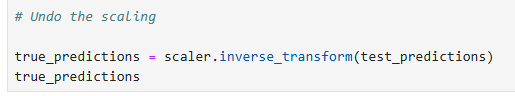

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[24454.88830912],
       [26671.02800459],
       [23530.16343898],
       [24304.7143873 ],
       [27274.35084385],
       [35177.31546146],
       [20801.96616274],
       [21385.50489485],
       [23059.8814891 ],
       [21418.04417276],
       [23686.45940781],
       [22560.35942483],
       [23307.10127366],
       [25640.1144349 ],
       [23179.74529755],
       [24103.68289202],
       [26847.02543837],
       [34394.59380955]])

array([[25867.03686076],
       [26708.37140393],
       [25016.20063967],
       [25854.56223851],
       [29340.47320271],
       [40268.42497611],
       [20830.97139931],
       [22252.6564256 ],
       [25053.23304337],
       [25580.6207518 ],
       [27142.1950959 ],
       [26136.75054663],
       [27203.31552541],
       [27836.48089719],
       [26630.20928335],
       [27364.5308798 ],
       [30701.01822633],
       [41377.06135786]])

_____________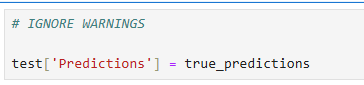

In [42]:
test['predictions'] = true_predictions

C:\Users\eresy\AppData\Local\Temp\ipykernel_1772\349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


C:\Users\vital\AppData\Local\Temp\ipykernel_18288\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


### Check and plot predictions

In [43]:
# Print the test variable

df.head()


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,Sales,Predictions
observation_date,,
2023-07-01,24911,25867.036861
2023-08-01,26657,26708.371404
2023-09-01,23332,25016.200640
2023-10-01,23933,25854.562239
2023-11-01,28580,29340.473203
2023-12-01,40684,40268.424976
2024-01-01,19188,20830.971399
2024-02-01,22005,22252.656426
2024-03-01,24986,25053.233043


_______________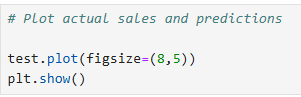

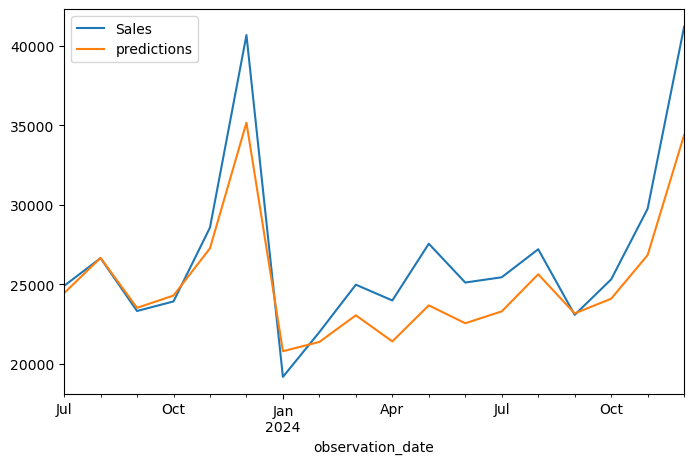

In [44]:
test.plot(figsize=(8, 5))
plt.show()

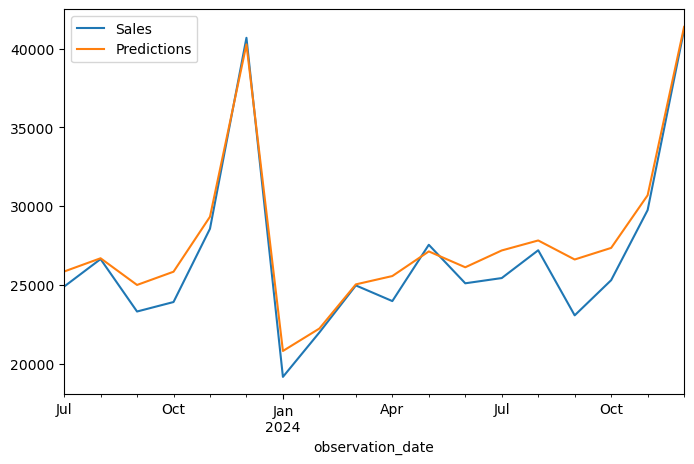

### Retrain and Forecasting

_________________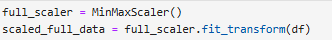

In [45]:
full_scaler = MinMaxScaler()
scaled_full_data =full_scaler.fit_transform(df)

______________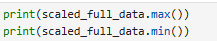

In [46]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


1.0
0.0


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [47]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [48]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model

model = Sequential()
model.add(SimpleRNN(140, activation='relu', return_sequences=True, input_shape=(length, n_features)))
model.add(SimpleRNN(70, activation='relu'))
model.add(Dense(1)) #because it is the regression task

C:\Users\eresy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 12, 140)             │          19,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 70)                  │          14,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,721 (135.63 KB)

 Trainable params: 34,721 (135.63 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# your code to compile the model

model.compile(optimizer='adam', loss='mse')

In [51]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# However,
# If the last digit of your SID = 0, then assign patience=10
# If the last digit of your SID = 1, then assign patience=11
# If the last digit of your SID = 2, then assign patience=12
# If the last digit of your SID = 3, then assign patience=13

# For example, your SID = 22984879, then patience=9
# One more example: your SID = 22984883, then patience=13

LAST_DIGIT_IN_YOUR_SID = 16

early_stop = EarlyStopping(monitor='val_loss',patience=LAST_DIGIT_IN_YOUR_SID)


____________________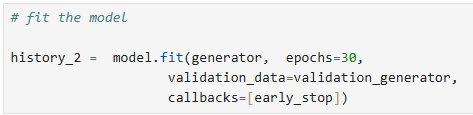

In [52]:
history_2 = model.fit(generator, epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0057 - val_loss: 0.0436
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0076 - val_loss: 3.8449e-04
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0026 - val_loss: 0.0180
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0031 - val_loss: 7.3694e-04
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0027 - val_loss: 6.0229e-04
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0031 - val_loss: 5.2436e-04
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 12/30
384/384 ━━━━━━━━━━━━━━

In [83]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.2812e-04 - val_loss: 0.0012
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 9.8140e-04 - val_loss: 8.0694e-04
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.6628e-04 - val_loss: 1.3032e-04
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 3.5904e-04
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.7465e-04 - val_loss: 0.0012
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.1748e-04 - val_loss: 0.0035
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.4265e-04 - val_loss: 0.0027
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014 - val_loss: 0.0071
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.4750e-04 - val_loss: 9.2657e-04
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 1

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

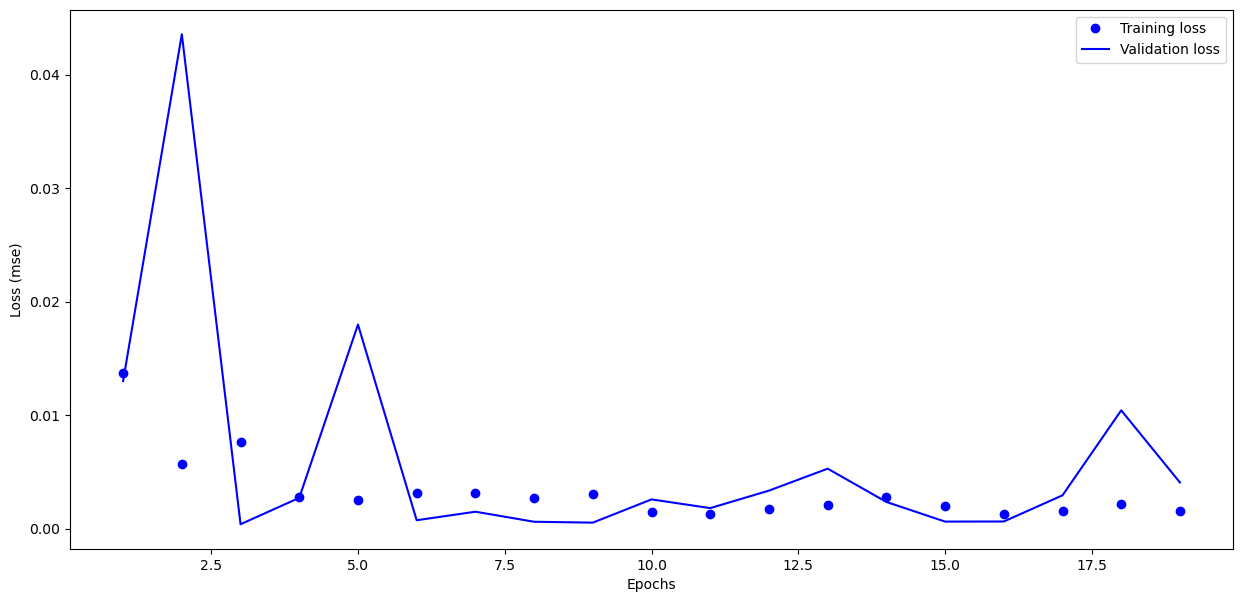

In [53]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [215]:
# You can use the code created above to type the next cell code

_________________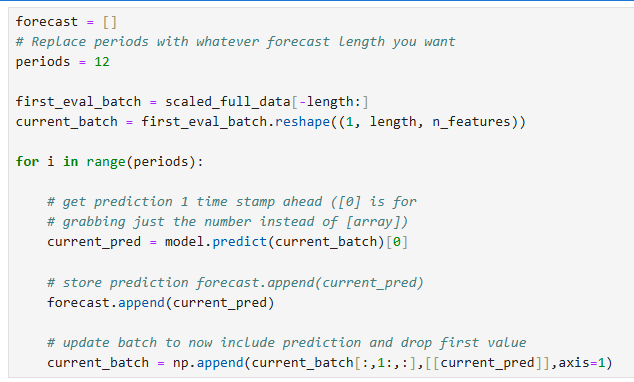

In [54]:
forecast = []
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
                                 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


______________________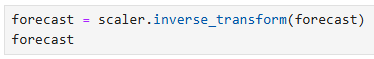

In [55]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[20307.11990702],
       [23696.98106444],
       [25402.16797483],
       [23550.50211877],
       [24902.53499603],
       [23395.30224645],
       [23153.93918395],
       [24015.95384967],
       [21161.73592126],
       [21822.73866487],
       [24403.91112196],
       [32004.59232867]])

array([[18620.61448288],
       [20206.91406763],
       [22167.73939276],
       [21757.40348327],
       [23828.92585731],
       [22448.01823115],
       [22479.73978627],
       [23555.70857722],
       [21352.45454019],
       [22294.99097872],
       [25707.46347636],
       [37294.23667431]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [56]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


##### Forecast for next 12 months

__________________

In [62]:
forecast_index = pd.date_range(start='2025-01-01', periods = periods, freq='MS')

__________________________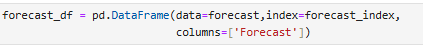

In [63]:
forecast_df = pd.DataFrame(data=forecast, index= forecast_index, columns=['forecast'])

________________________

In [64]:
forecast_df

,forecast
2025-01-01,20307.119907
2025-02-01,23696.981064
2025-03-01,25402.167975
2025-04-01,23550.502119
2025-05-01,24902.534996
2025-06-01,23395.302246
2025-07-01,23153.939184
2025-08-01,24015.953850
2025-09-01,21161.735921
2025-10-01,21822.738665


,Forecast
2025-01-01,18620.614483
2025-02-01,20206.914068
2025-03-01,22167.739393
2025-04-01,21757.403483
2025-05-01,23828.925857
2025-06-01,22448.018231
2025-07-01,22479.739786
2025-08-01,23555.708577
2025-09-01,21352.454540
2025-10-01,22294.990979


__________________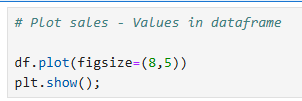

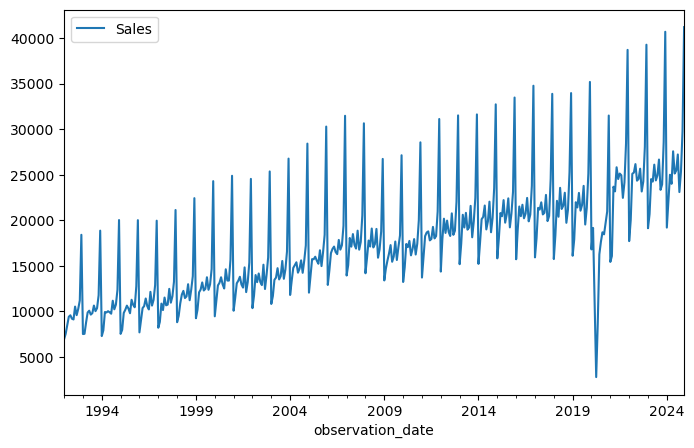

In [65]:
df.plot(figsize=(8,5))
plt.show();

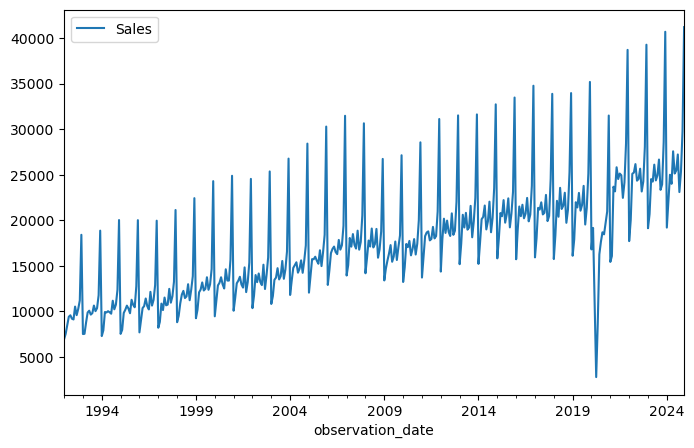

____________________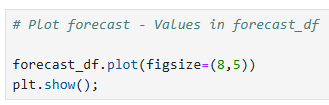

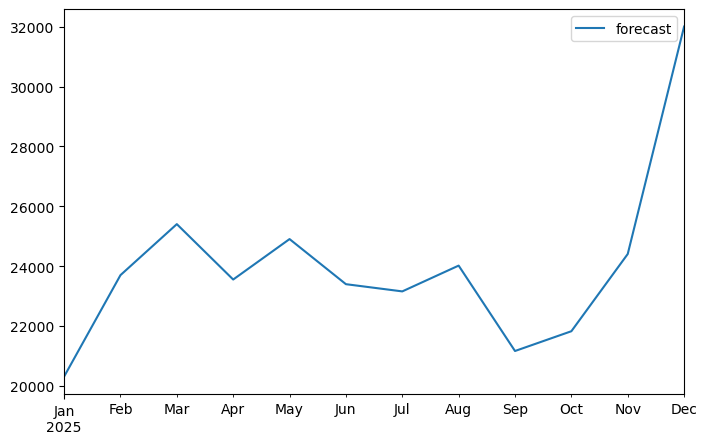

In [66]:
forecast_df.plot(figsize=(8, 5))
plt.show();

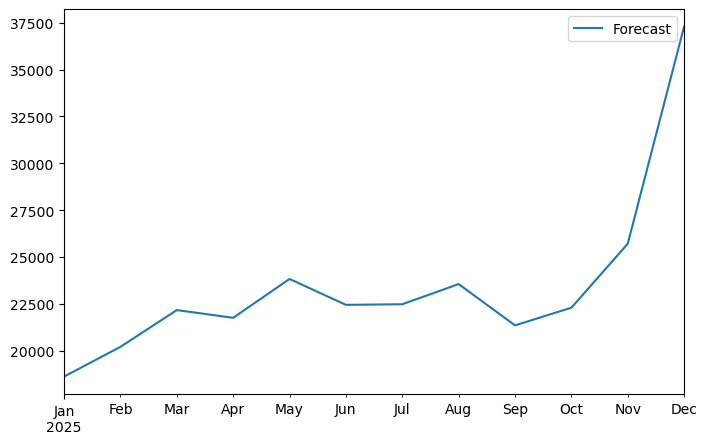

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________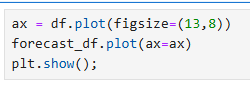

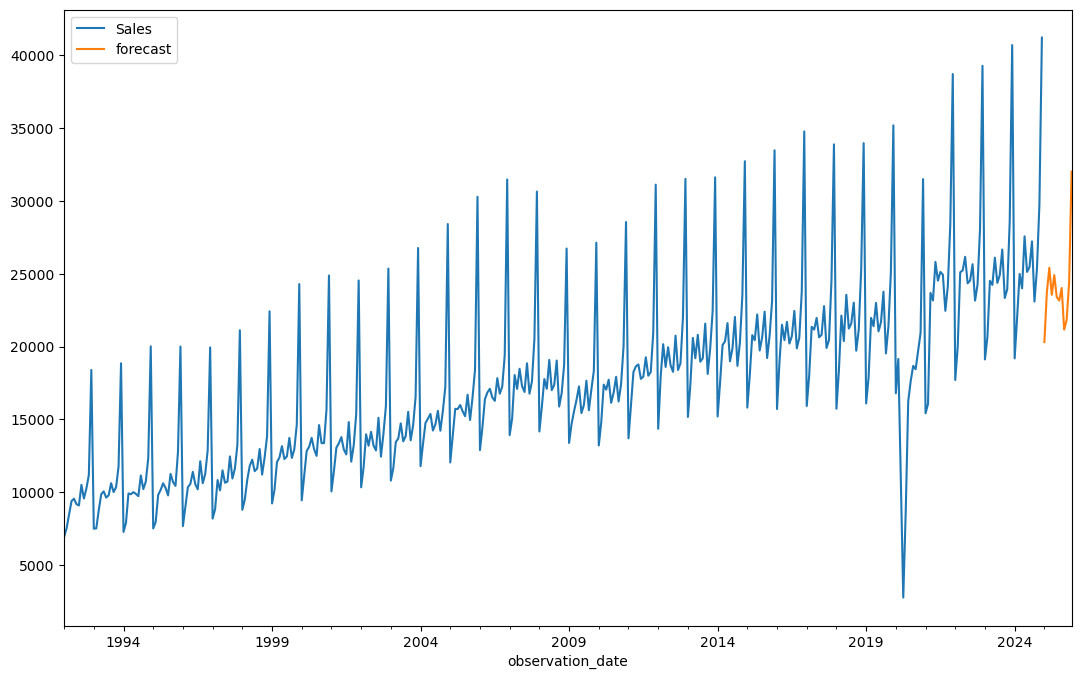

In [67]:
ax = df.plot(figsize =(13, 8))
forecast_df.plot(ax=ax)
plt.show();

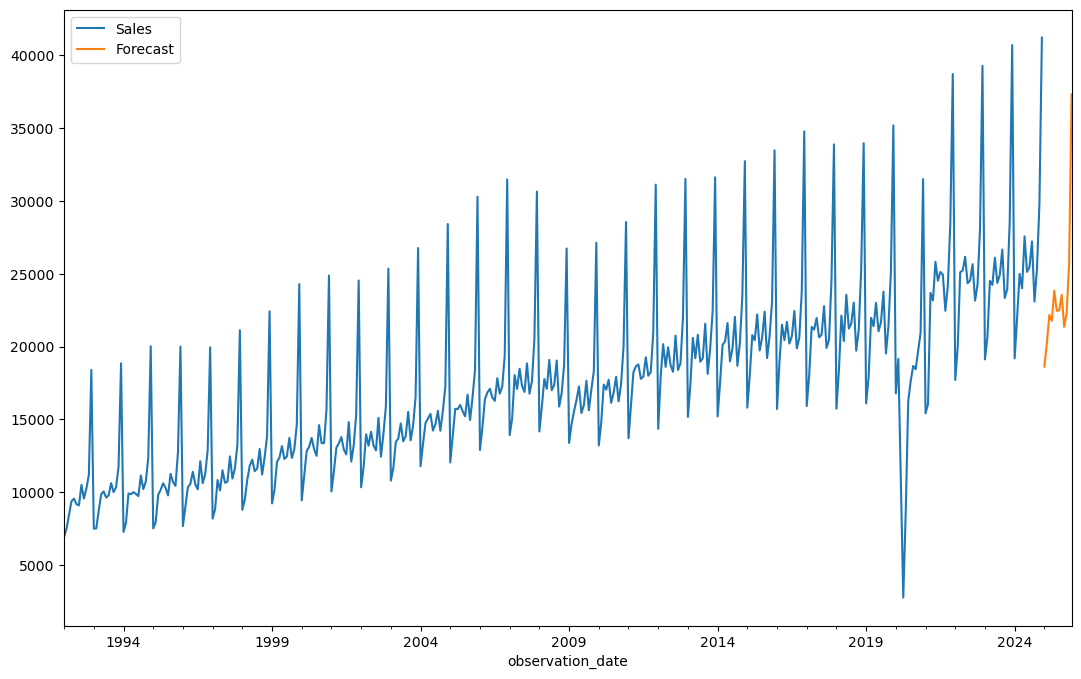

_______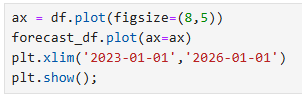

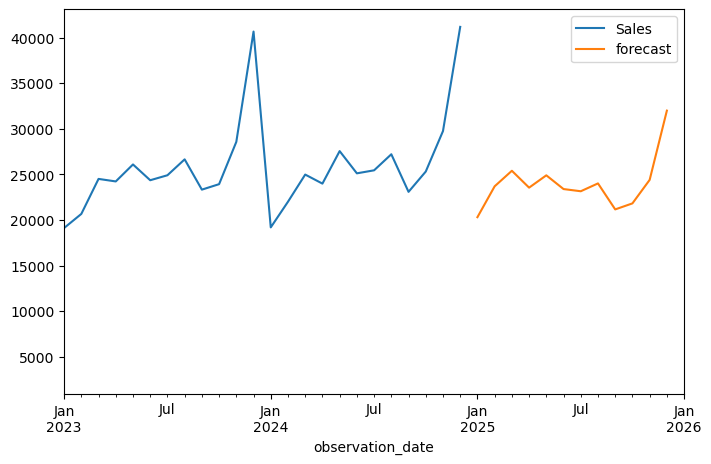

In [69]:
ax = df.plot(figsize=(8, 5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01', '2026-01-01')
plt.show();
         

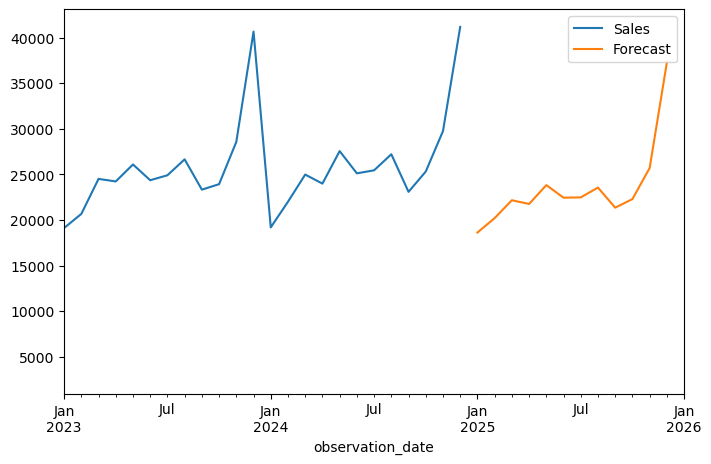

### Checking Forecast for last 12 months

_______________________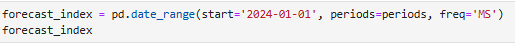

In [80]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

________________________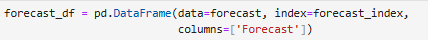

In [81]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['forecast'])

___________________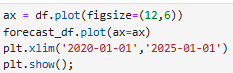

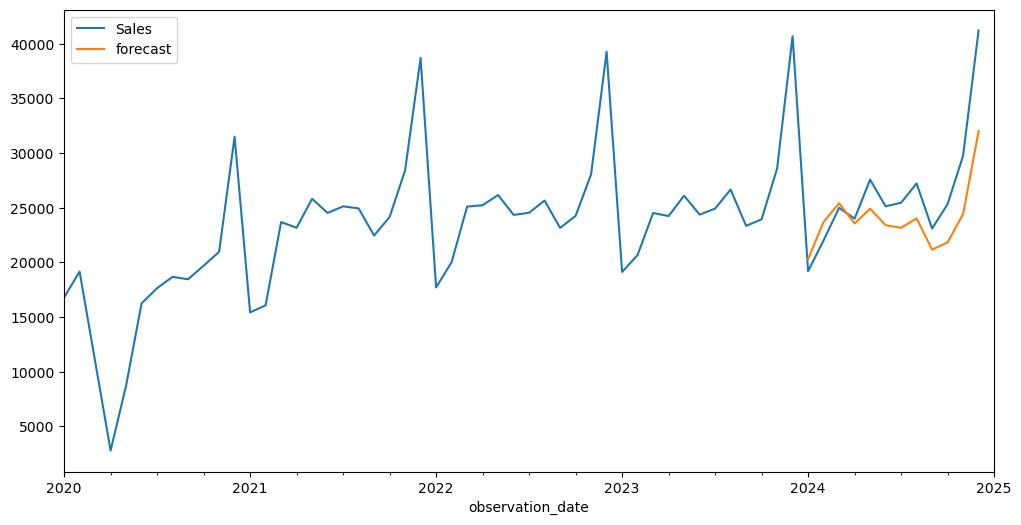

In [82]:
ax = df.plot(figsize=(12, 6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01', '2025-01-01')
plt.show();
         

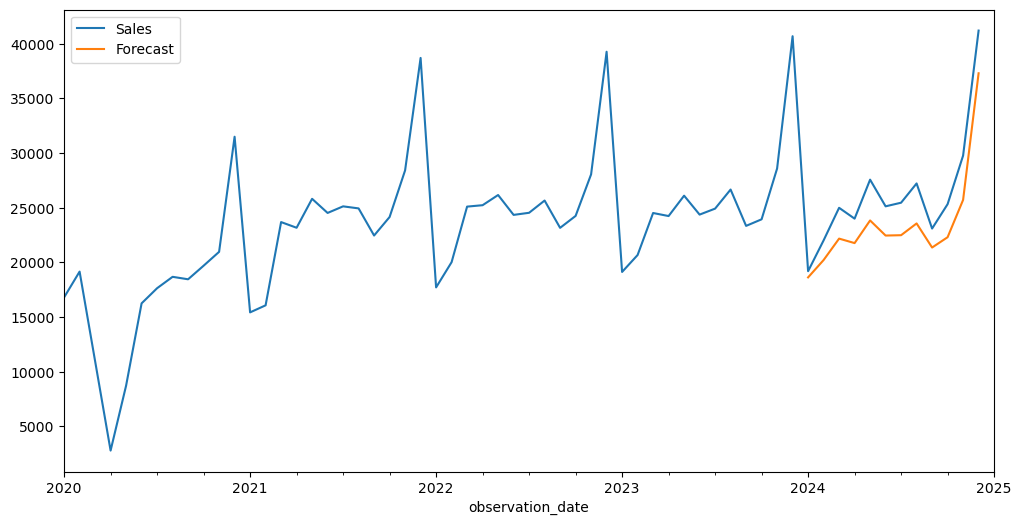

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Record the 2nd model's code & plot the summary()

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### 5. Record the plot of the Checking Forecast for the last 12 months (last graph).

### Try the same example with a LSTM and/or GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!